In [1]:
# Install if not already installed
!pip install pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load the dataset
df = pd.read_csv("Retail_Sales_Dataset.csv")  # Replace with your CSV path

# View first 5 rows
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create 'YearMonth' column for monthly aggregation
df['YearMonth'] = df['Date'].dt.to_period('M')


In [4]:
# Calculate total sales per transaction
df['Total_Sales'] = df['Quantity'] * df['Price per Unit']

# Aggregate total sales by month
monthly_sales = df.groupby('YearMonth')['Total_Sales'].sum()

# Display monthly sales
monthly_sales


YearMonth
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total_Sales, dtype: int64

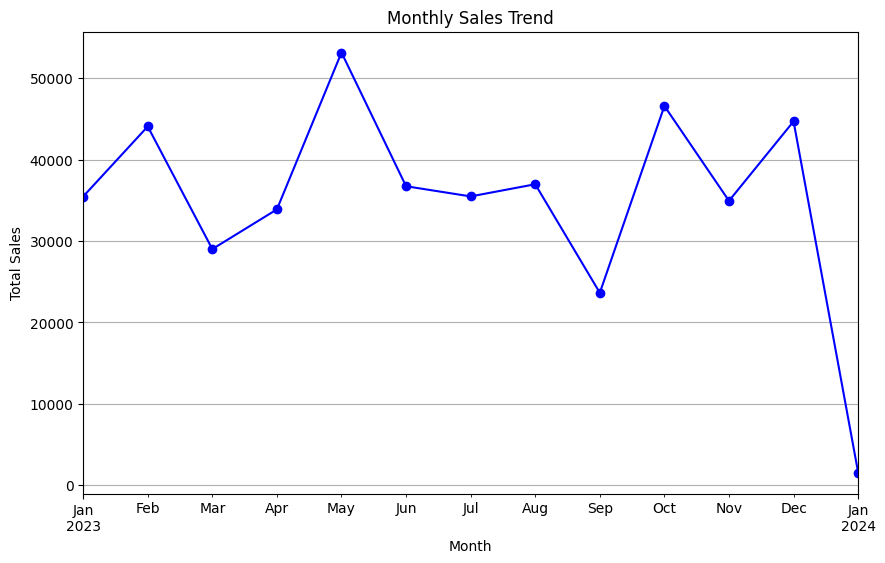

In [5]:
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [6]:
# Calculate month-to-month growth rate
monthly_growth = monthly_sales.pct_change().mean()

# Get last month's sales
last_month_sales = monthly_sales[-1]

# Project next month's sales
next_month_sales = last_month_sales * (1 + monthly_growth)
print(f"Projected Sales for Next Month: {next_month_sales:.2f}")


Projected Sales for Next Month: 1531.55


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14508\3393742576.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_month_sales = monthly_sales[-1]
